In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import covariance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("iris.csv")
print("Shape of the data = " + str(data.shape))
data.head(n=5)

Shape of the data = (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

X = data.drop(["Id", "Species"], axis = 1).values

y = data["Species"].values
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y).T
#print(y)

target_names = le.classes_
print(target_names)

#print(y)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


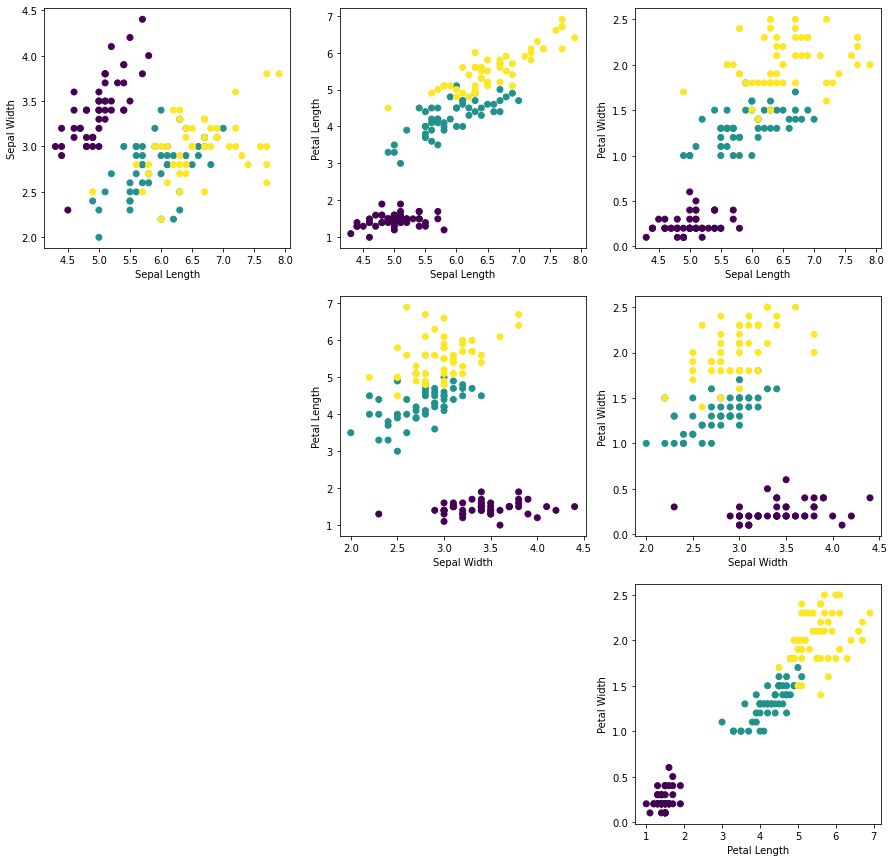

In [4]:
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.scatter(data["SepalLengthCm"], data["SepalWidthCm"], c = y)
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(332)
plt.scatter(data["SepalLengthCm"], data["PetalLengthCm"], c = y)
plt.xlabel('Sepal Length'); plt.ylabel('Petal Length')

plt.subplot(333)
plt.scatter(data["SepalLengthCm"], data["PetalWidthCm"], c = y)
plt.xlabel('Sepal Length'); plt.ylabel('Petal Width')

plt.subplot(335)
plt.scatter(data["SepalWidthCm"], data["PetalLengthCm"], c = y)
plt.xlabel('Sepal Width'); plt.ylabel('Petal Length')

plt.subplot(336)
plt.scatter(data["SepalWidthCm"], data["PetalWidthCm"], c = y)
plt.xlabel('Sepal Width'); plt.ylabel('Petal Width')

plt.subplot(339)
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"], c = y)
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')


plt.show()

In [5]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print("Principal Component Analysis: ")
print("Explained variance ratio (first two components): " + str(pca.explained_variance_ratio_))
print("These two components cover " + str(round(100*sum(pca.explained_variance_ratio_) ,2)) + "% of the variance")

Principal Component Analysis: 
Explained variance ratio (first two components): [0.92461621 0.05301557]
These two components cover 97.76% of the variance


In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print("Linear discriminant Analysis: ")
print("Explained variance ratio (first two components): " + str(lda.explained_variance_ratio_))
print("These two components cover " + str(round(100*sum(lda.explained_variance_ratio_) ,2)) + "% of the variance")

Linear discriminant Analysis: 
Explained variance ratio (first two components): [0.99147248 0.00852752]
These two components cover 100.0% of the variance


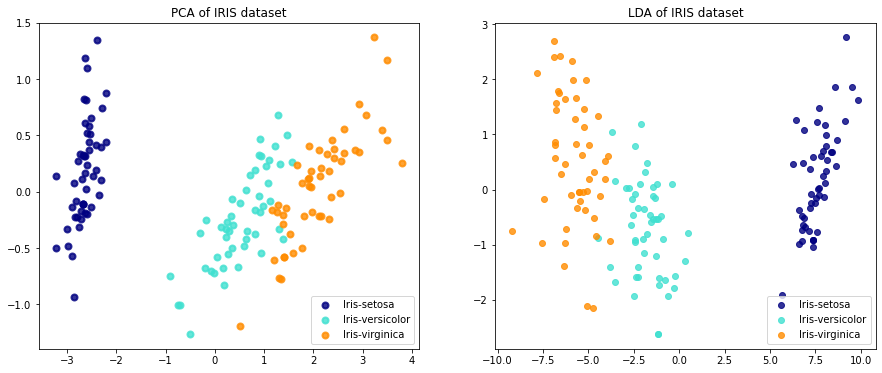

In [7]:
plt.figure(figsize=(15,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.subplot(121)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.subplot(122)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.3)

sc = MinMaxScaler().fit(X_train)

X_train_scaled = pd.DataFrame(sc.transform(X_train))
X_test_scaled = pd.DataFrame(sc.transform(X_test))

In [15]:
clf_svm = svm.SVC(gamma=0.001, C=100.)
clf_svm.fit(X_train_scaled, y_train)

y_predict_svm = clf_svm.predict(X_test_scaled)

target_names = target_names
print(classification_report(y_test, y_predict_svm, target_names=target_names))

#print(y_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.60      0.86      0.71        14
 Iris-virginica       0.78      0.47      0.58        15

       accuracy                           0.78        45
      macro avg       0.79      0.77      0.76        45
   weighted avg       0.80      0.78      0.77        45

